<a href="https://colab.research.google.com/github/tahae02/week_4_AI_Powered_Data_Analysis_Automation/blob/main/Week_4_AI_Powered_Data_Analysis_%26_Automation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

file_path="/content/drive/MyDrive/Colab Notebooks/Uptrail Data Internship Projects /Week 4/2 cleaned dataset week 4.xlsx"

df=pd.read_excel(file_path)

df.head()
# display(df.dtypes)

,Date,Customer_ID,Age,Gender,Income,Spending_Score,Credit_Score,Loan_Amount,Previous_Defaults,Marketing_Spend,Purchase_Frequency,Seasonality,Sales,Customer_Churn,Defaulted
0,2024-04-12,1,56,Female,142418,7,391,8083,1,15376,3,Low,32526,0,0
1,2024-02-21,2,69,Male,63088,82,652,34328,2,6889,6,Low,78493,0,0
2,2024-04-02,3,46,Male,136868,91,662,47891,2,6054,29,Medium,57198,1,0
3,2024-01-15,4,32,Female,84772,34,644,25103,2,4868,8,Medium,48395,0,0
4,2024-04-16,5,60,Male,59811,91,469,44891,1,17585,12,High,29031,1,0


In [ ]:
print(df.isnull().sum())

Date                  0
Customer_ID           0
Age                   0
Gender                0
Income                0
Spending_Score        0
Credit_Score          0
Loan_Amount           0
Previous_Defaults     0
Marketing_Spend       0
Purchase_Frequency    0
Seasonality           0
Sales                 0
Customer_Churn        0
Defaulted             0
dtype: int64


In [ ]:
# import machine learning libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder

In [ ]:
# apply one-hot encoding to the seasonality index
# Encode Seasonality (Low/Medium/High to 1/2/3)
le = LabelEncoder()
df['Seasonality_Encoded'] = le.fit_transform(df['Seasonality'])


In [ ]:
# defining the features and target variables
X = df[['Spending_Score', 'Seasonality_Encoded']]  # Use Spending_Score as proxy for Marketing_Spend
y = df['Sales']

# splitting the data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# training the model
model = LinearRegression()
model.fit(X_train, y_train)

# predicting and evaluating
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print(f"Model MSE: {mse}")

# saving the model predictions
results = pd.DataFrame({'Actual_Sales': y_test, 'Predicted_Sales': predictions})
results.to_csv('sales_predictions.csv', index=False)
print("Predictions saved to sales_predictions.csv")

# Feature coefficients
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_})
display(coefficients)

Model MSE: 780614383.3781114
Predictions saved to sales_predictions.csv


,Feature,Coefficient
0,Spending_Score,-2.237235
1,Seasonality_Encoded,-274.640409


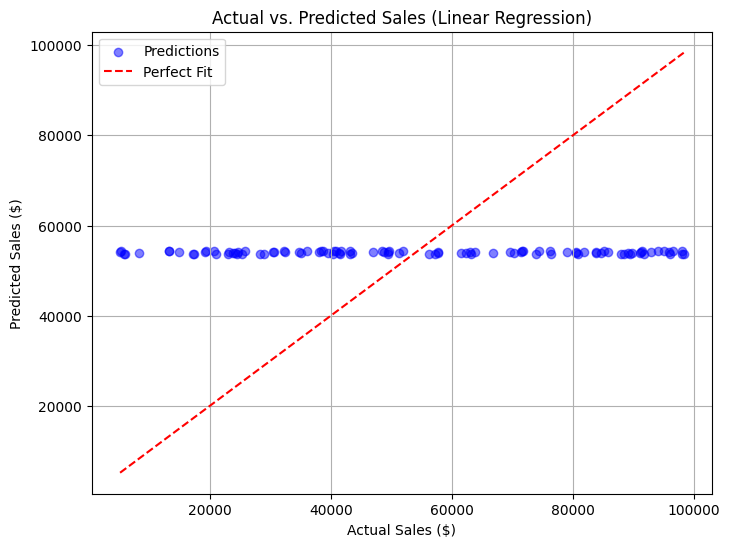

In [ ]:
import matplotlib.pyplot as plt

# Scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test, predictions, alpha=0.5, color='blue', label='Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Perfect Fit')
plt.xlabel('Actual Sales ($)')
plt.ylabel('Predicted Sales ($)')
plt.title('Actual vs. Predicted Sales (Linear Regression)')
plt.legend()
plt.grid(True)
plt.savefig('actual_vs_predicted_sales.png')
plt.show()

In [ ]:
# Save model summary as CSV
summary_df = pd.DataFrame({
    'Metric': ['MSE'] + ['Coefficient_' + feat for feat in coefficients['Feature']],
    'Value': [mse] + list(coefficients['Coefficient'])
})
summary_df.to_csv('sales_model_summary.csv', index=False)
print("Model summary saved to sales_model_summary.csv")

Model summary saved to sales_model_summary.csv


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, mean_squared_error


# Verify columns
required_columns = ['Income', 'Loan_Amount', 'Credit_Score', 'Defaulted']
if not all(col in df.columns for col in required_columns):
    print("Error: Missing columns. Available:", df.columns.tolist())
    exit()

# Prepare features and target
X = df[['Income', 'Loan_Amount', 'Credit_Score']]
y = df['Defaulted']

# Split data (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict
predictions = model.predict(X_test)

# Evaluate
accuracy = accuracy_score(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
print(f"Accuracy: {accuracy:.4f}")
print(f"MSE: {mse:.4f}")

# Save predictions
results = pd.DataFrame({'Actual_Defaulted': y_test, 'Predicted_Defaulted': predictions})
results.to_csv('default_predictions.csv', index=False)
print("Predictions saved to default_predictions.csv")

Accuracy: 0.7677
MSE: 0.2323
Predictions saved to default_predictions.csv


[[73  1]
 [22  3]]


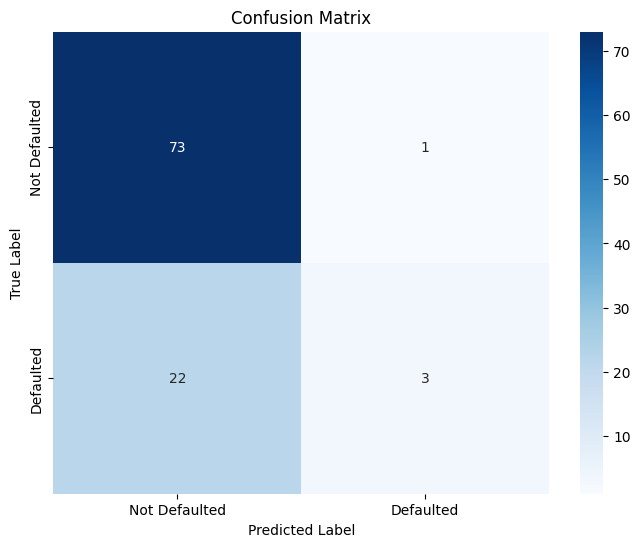

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, predictions)
print(cm)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Defaulted', 'Defaulted'], yticklabels=['Not Defaulted', 'Defaulted'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

precision, recall and default prevalence

In [ ]:
# prompt: precision, recall and default prevalence for the random forest classifier

from sklearn.metrics import precision_score, recall_score

# Calculate precision and recall for the positive class (assuming 'Defaulted' is the positive class, which is typically represented by 1)
precision = precision_score(y_test, predictions, pos_label=1)
recall = recall_score(y_test, predictions, pos_label=1)

# Calculate default prevalence in the test set
default_prevalence = y_test.mean()

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"Default Prevalence (Test Set): {default_prevalence:.4f}")

Precision: 0.7500
Recall: 0.1200
Default Prevalence (Test Set): 0.2525
